################################
Image: /home/tomek/twm/TWM/project/data/cityscapes/leftImg8bit/val/frankfurt/frankfurt_000000_000576_leftImg8bit.png
Mask: /home/tomek/twm/TWM/project/data/cityscapes/gtFine/val/frankfurt/frankfurt_000000_000576_gtFine_color.png


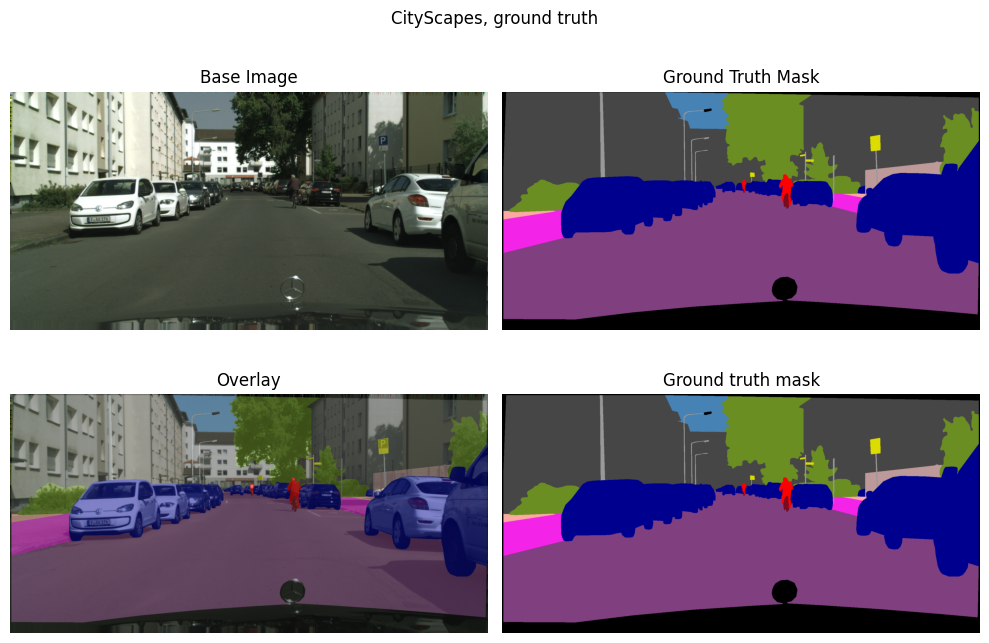

################################
Image: /home/tomek/twm/TWM/project/data/cityscapes_foggy/leftImg8bit/val/frankfurt/frankfurt_000000_000576_leftImg8bit_foggy_beta_0.02.png
Mask: /home/tomek/twm/TWM/project/test_results/deeplab_base_predict_cityscapes_foggy/frankfurt/frankfurt_000000_000576_leftImg8bit_foggy_beta_0.02.png


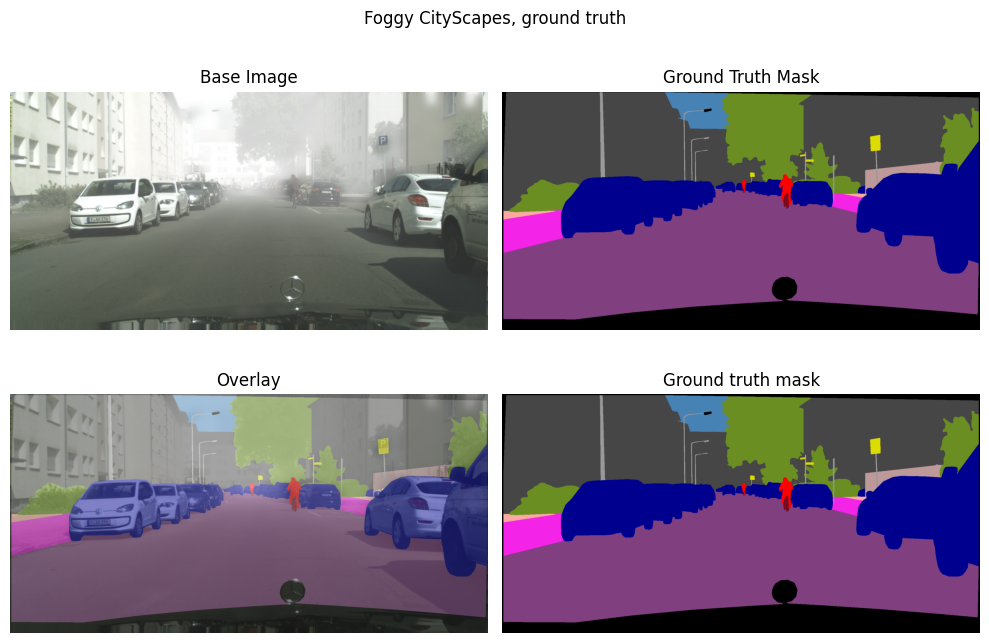

################################
Image: /home/tomek/twm/TWM/project/results/cityscapes_foggy_dehazed_base_0_02/dehazeformer-t/leftImg8bit/val/frankfurt/frankfurt_000000_000576_leftImg8bit_foggy_beta_0.02.png
Mask: /home/tomek/twm/TWM/project/test_results/deeplab_base_predict_cityscapes_foggy_dehazed_base/frankfurt_000000_000576_leftImg8bit_foggy_beta_0.02.png


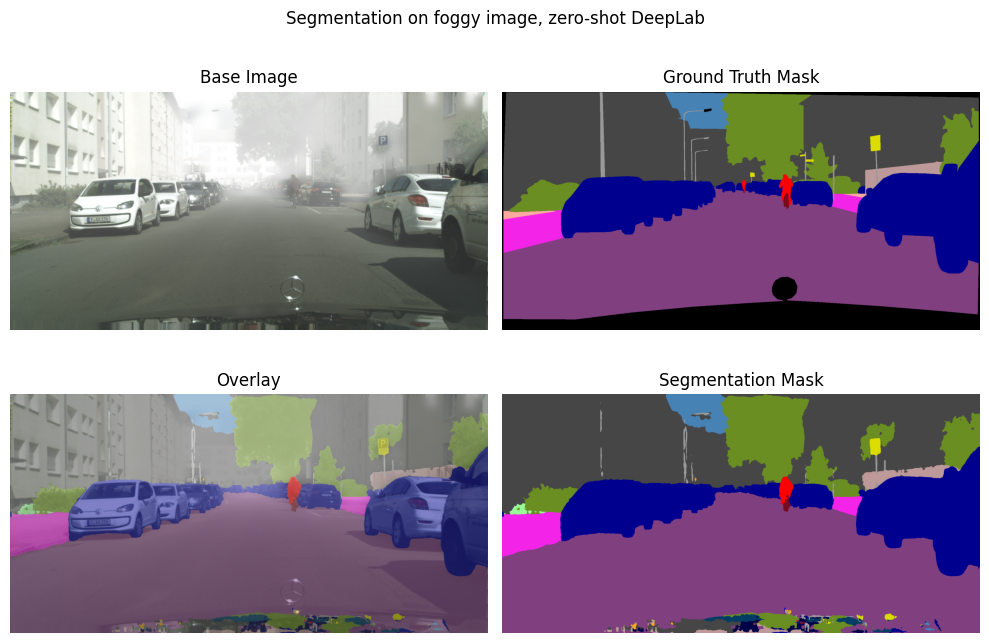

################################
Image: /home/tomek/twm/TWM/project/results/cityscapes_foggy_dehazed_base_0_02/dehazeformer-t/leftImg8bit/val/frankfurt/frankfurt_000000_000576_leftImg8bit_foggy_beta_0.02.png
Mask: /home/tomek/twm/TWM/project/test_results/deeplab_base_predict_cityscapes_foggy_dehazed_base/frankfurt_000000_000576_leftImg8bit_foggy_beta_0.02.png


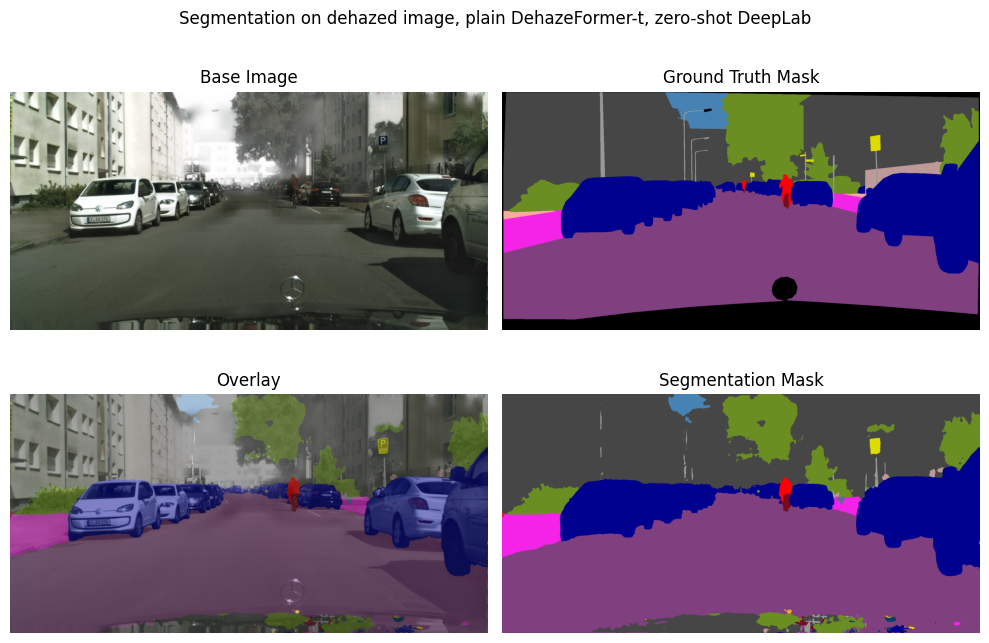

################################
Image: /home/tomek/twm/TWM/project/results/cityscapes_foggy_dehazed_ft_0_02/dehazeformer-t/leftImg8bit/val/frankfurt/frankfurt_000000_000576_leftImg8bit_foggy_beta_0.02.png
Mask: /home/tomek/twm/TWM/project/test_results/deeplab_base_predict_cityscapes_foggy_dehazed_ft/frankfurt_000000_000576_leftImg8bit_foggy_beta_0.02.png


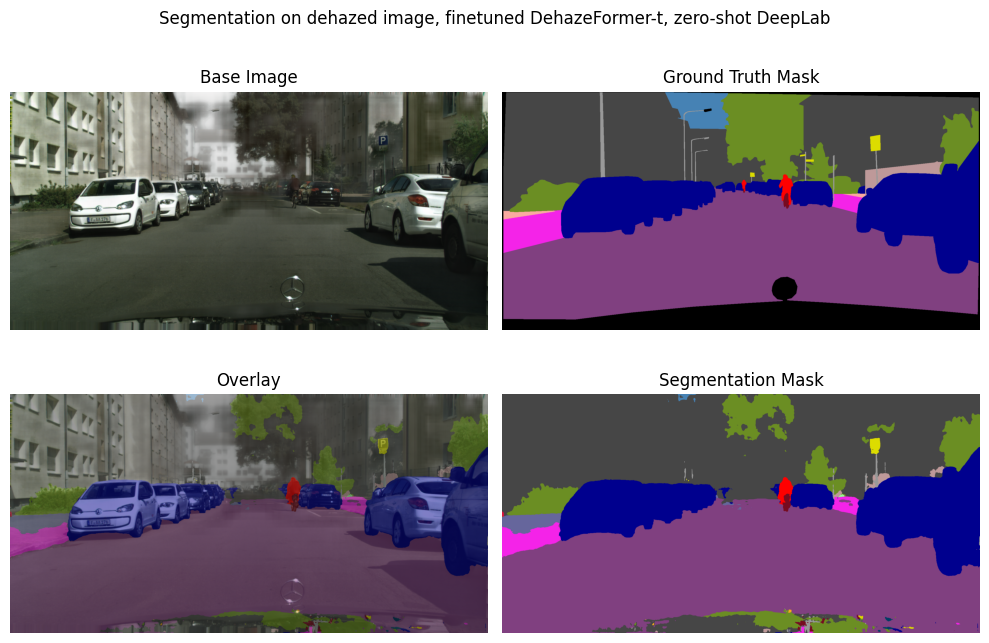

################################
Image: /home/tomek/twm/TWM/project/results/cityscapes_foggy_dehazed_dhfb_base_0_02/dehazeformer-b/leftImg8bit/val/frankfurt/frankfurt_000000_000576_leftImg8bit_foggy_beta_0.02.png
Mask: /home/tomek/twm/TWM/project/test_results/deeplab_base_predict_cityscapes_foggy_dehazed_dhfb_base/frankfurt_000000_000576_leftImg8bit_foggy_beta_0.02.png


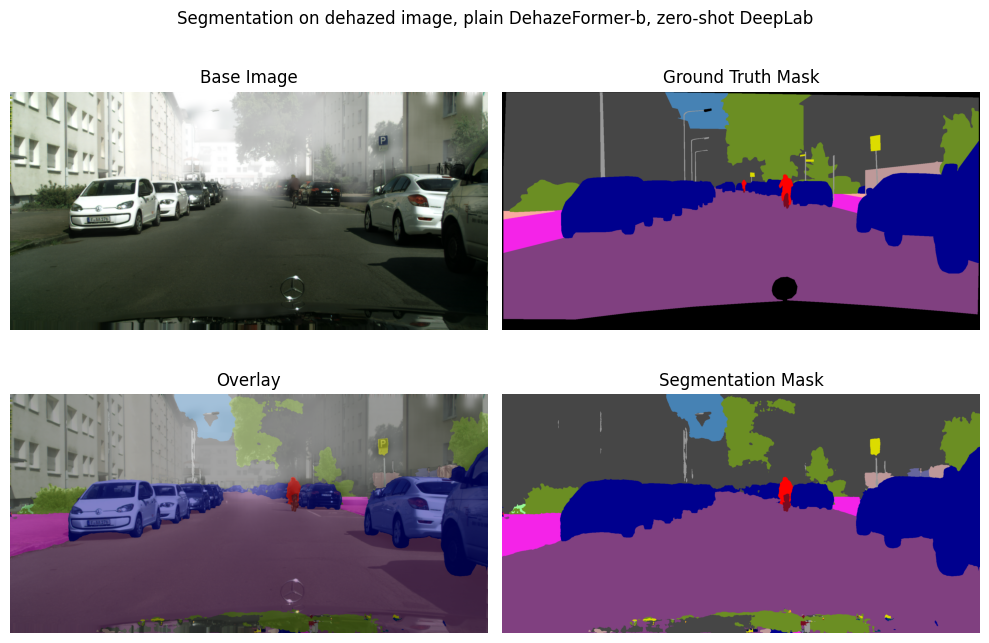

################################
Image: /home/tomek/twm/TWM/project/results/cityscapes_foggy_dehazed_dhfb_ft_0_02/dehazeformer-b/leftImg8bit/val/frankfurt/frankfurt_000000_000576_leftImg8bit_foggy_beta_0.02.png
Mask: /home/tomek/twm/TWM/project/test_results/deeplab_base_predict_cityscapes_foggy_dehazed_dhfb_ft/frankfurt_000000_000576_leftImg8bit_foggy_beta_0.02.png


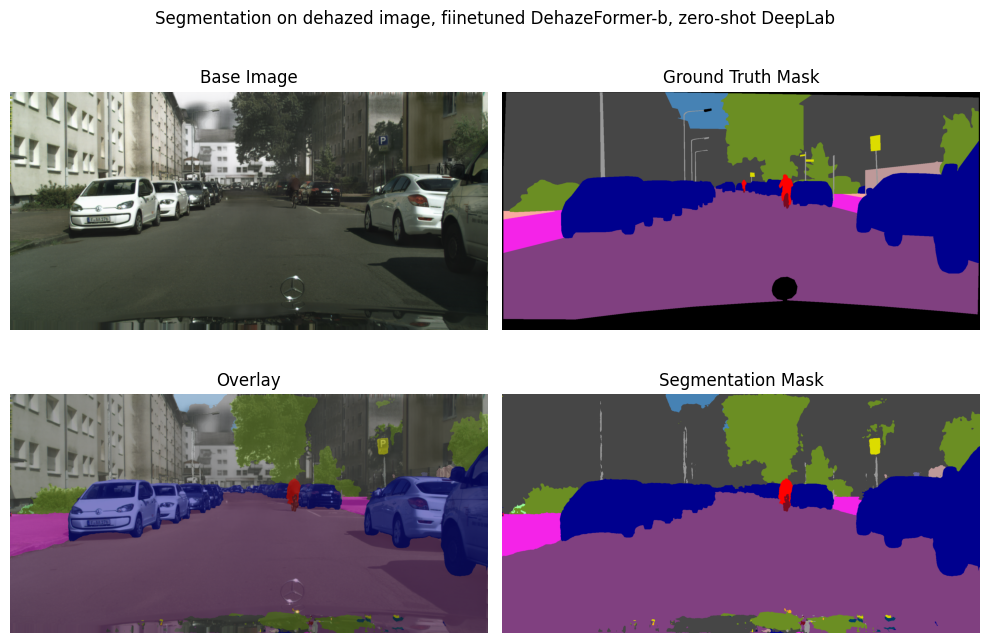

################################
Image: /home/tomek/twm/TWM/project/data/cityscapes_foggy/leftImg8bit/val/frankfurt/frankfurt_000000_000576_leftImg8bit_foggy_beta_0.02.png
Mask: /home/tomek/twm/TWM/project/test_results/deeplab_ft_predict_cityscapes_foggy/frankfurt_000000_000576_leftImg8bit_foggy_beta_0.02.png


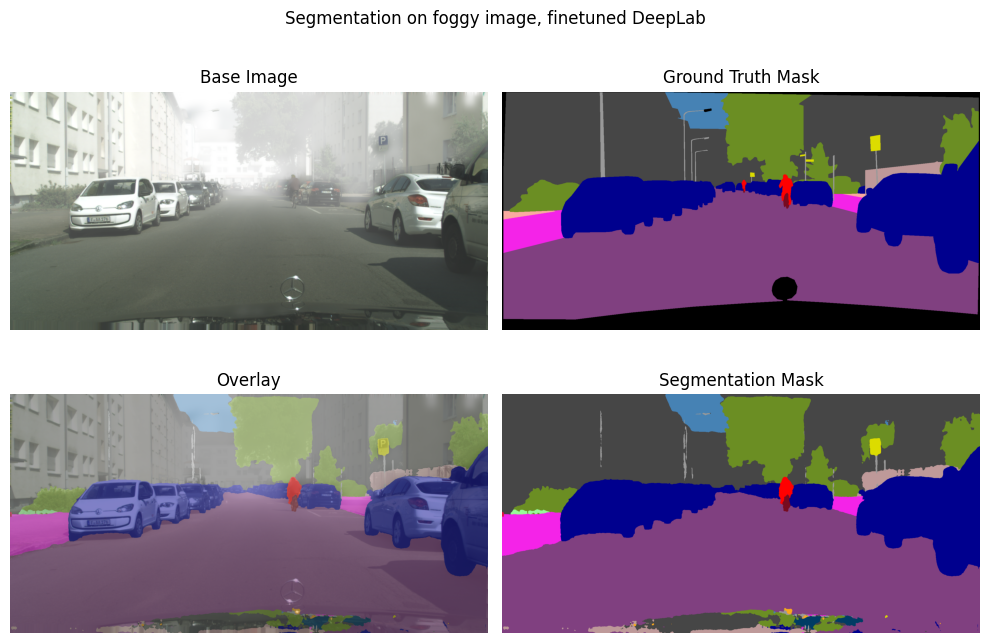

In [ ]:
from pathlib import Path

from matplotlib import pyplot as plt

CITYSCAPES_DIR = Path("/home/tomek/twm/TWM/project/data/cityscapes")
CITYSCAPES_FOGGY_DIR = Path("/home/tomek/twm/TWM/project/data/cityscapes_foggy")
DEHAZED_RESULTS_DIR = Path("/home/tomek/twm/TWM/project/results")
DEEPLAB_RESULTS_DIR = Path("/home/tomek/twm/TWM/project/test_results/")
assert CITYSCAPES_DIR.exists() and CITYSCAPES_DIR.is_dir()
assert CITYSCAPES_FOGGY_DIR.exists() and CITYSCAPES_FOGGY_DIR.is_dir()
assert DEHAZED_RESULTS_DIR.exists() and DEHAZED_RESULTS_DIR.is_dir()
assert DEEPLAB_RESULTS_DIR.exists() and DEEPLAB_RESULTS_DIR.is_dir()


def plot_img(
    img_path: Path,
    mask_path: Path,
    gt_mask_path: Path,
    title: str = None,
    *,
    base_title: str = None,
    mask_title: str = None,
    overlay_title: str = None,
):
    base_img = plt.imread(img_path)
    mask_img = plt.imread(mask_path)
    gt_mask_img = plt.imread(gt_mask_path)

    fig, axes = plt.subplots(2, 2, figsize=(10, 7))

    axes[0][0].imshow(base_img)
    axes[0][0].set_title(base_title or "Base Image")
    axes[0][0].axis("off")

    axes[0][1].imshow(gt_mask_img)
    axes[0][1].set_title("Ground Truth Mask")
    axes[0][1].axis("off")

    mask_img = plt.imread(mask_path)
    axes[1][1].imshow(mask_img)
    axes[1][1].set_title(mask_title or "Segmentation Mask")
    axes[1][1].axis("off")

    axes[1][0].imshow(base_img)
    axes[1][0].imshow(mask_img, alpha=0.5)
    axes[1][0].set_title(overlay_title or "Overlay")
    axes[1][0].axis("off")

    if title:
        fig.suptitle(title)

    plt.tight_layout()
    plt.show()


####################################
# INPUT
#########################

# frankfurt, munster, lindau
city = "frankfurt"
img_id = "000000_000576"
# 0.02, 0.01, 0.005
fog_density = 0.02

############################

# region plotting

source_img = CITYSCAPES_DIR / "leftImg8bit" / "val" / city / f"{city}_{img_id}_leftImg8bit.png"
source_mask = CITYSCAPES_DIR / "gtFine" / "val" / city / f"{city}_{img_id}_gtFine_color.png"

foggy_img = (
    CITYSCAPES_FOGGY_DIR / "leftImg8bit" / "val" / city / f"{city}_{img_id}_leftImg8bit_foggy_beta_{fog_density}.png"
)
foggy_mask = (
    DEEPLAB_RESULTS_DIR
    / "deeplab_base_predict_cityscapes_foggy"
    / city
    / f"{city}_{img_id}_leftImg8bit_foggy_beta_{fog_density}.png"
)

dehazed_dhft_base_img = (
    DEHAZED_RESULTS_DIR
    / f"cityscapes_foggy_dehazed_base_{str(fog_density).replace('.', '_')}"
    / "dehazeformer-t"
    / "leftImg8bit"
    / "val"
    / city
    / f"{city}_{img_id}_leftImg8bit_foggy_beta_{fog_density}.png"
)
dehazed_dhft_base_mask = (
    DEEPLAB_RESULTS_DIR
    / "deeplab_base_predict_cityscapes_foggy_dehazed_base"
    / f"{city}_{img_id}_leftImg8bit_foggy_beta_{fog_density}.png"
)

dehazed_dhft_ft_img = (
    DEHAZED_RESULTS_DIR
    / f"cityscapes_foggy_dehazed_ft_{str(fog_density).replace('.', '_')}"
    / "dehazeformer-t"
    / "leftImg8bit"
    / "val"
    / city
    / f"{city}_{img_id}_leftImg8bit_foggy_beta_{fog_density}.png"
)
dehazed_dhft_ft_mask = (
    DEEPLAB_RESULTS_DIR
    / "deeplab_base_predict_cityscapes_foggy_dehazed_ft"
    / f"{city}_{img_id}_leftImg8bit_foggy_beta_{fog_density}.png"
)


dehazed_dhfb_base_img = (
    DEHAZED_RESULTS_DIR
    / f"cityscapes_foggy_dehazed_dhfb_base_{str(fog_density).replace('.', '_')}"
    / "dehazeformer-b"
    / "leftImg8bit"
    / "val"
    / city
    / f"{city}_{img_id}_leftImg8bit_foggy_beta_{fog_density}.png"
)
dehazed_dhfb_base_mask = (
    DEEPLAB_RESULTS_DIR
    / "deeplab_base_predict_cityscapes_foggy_dehazed_dhfb_base"
    / f"{city}_{img_id}_leftImg8bit_foggy_beta_{fog_density}.png"
)


dehazed_dhfb_ft_img = (
    DEHAZED_RESULTS_DIR
    / f"cityscapes_foggy_dehazed_dhfb_ft_{str(fog_density).replace('.', '_')}"
    / "dehazeformer-b"
    / "leftImg8bit"
    / "val"
    / city
    / f"{city}_{img_id}_leftImg8bit_foggy_beta_{fog_density}.png"
)
dehazed_dhfb_ft_mask = (
    DEEPLAB_RESULTS_DIR
    / "deeplab_base_predict_cityscapes_foggy_dehazed_dhfb_ft"
    / f"{city}_{img_id}_leftImg8bit_foggy_beta_{fog_density}.png"
)

foggy_mask_ft = (
    DEEPLAB_RESULTS_DIR
    / "deeplab_ft_predict_cityscapes_foggy"
    / f"{city}_{img_id}_leftImg8bit_foggy_beta_{fog_density}.png"
)


print("#" * 32)
print(f"Image: {source_img}")
print(f"Mask: {source_mask}")
plot_img(source_img, source_mask, source_mask, "CityScapes, ground truth", mask_title="Ground truth mask")

print("#" * 32)
print(f"Image: {foggy_img}")
print(f"Mask: {foggy_mask}")
plot_img(foggy_img, source_mask, source_mask, "Foggy CityScapes, ground truth", mask_title="Ground truth mask")

print("#" * 32)
print(f"Image: {dehazed_dhft_base_img}")
print(f"Mask: {dehazed_dhft_base_mask}")
plot_img(foggy_img, foggy_mask, source_mask, "Segmentation on foggy image, zero-shot DeepLab")

print("#" * 32)
print(f"Image: {dehazed_dhft_base_img}")
print(f"Mask: {dehazed_dhft_base_mask}")
plot_img(
    dehazed_dhft_base_img,
    dehazed_dhft_base_mask,
    source_mask,
    "Segmentation on dehazed image, plain DehazeFormer-t, zero-shot DeepLab",
)

print("#" * 32)
print(f"Image: {dehazed_dhft_ft_img}")
print(f"Mask: {dehazed_dhft_ft_mask}")
plot_img(
    dehazed_dhft_ft_img,
    dehazed_dhft_ft_mask,
    source_mask,
    "Segmentation on dehazed image, finetuned DehazeFormer-t, zero-shot DeepLab",
)

print("#" * 32)
print(f"Image: {dehazed_dhfb_base_img}")
print(f"Mask: {dehazed_dhfb_base_mask}")
plot_img(
    dehazed_dhfb_base_img,
    dehazed_dhfb_base_mask,
    source_mask,
    "Segmentation on dehazed image, plain DehazeFormer-b, zero-shot DeepLab",
)

print("#" * 32)
print(f"Image: {dehazed_dhfb_ft_img}")
print(f"Mask: {dehazed_dhfb_ft_mask}")
plot_img(
    dehazed_dhfb_ft_img,
    dehazed_dhfb_ft_mask,
    source_mask,
    "Segmentation on dehazed image, fiinetuned DehazeFormer-b, zero-shot DeepLab",
)

print("#" * 32)
print(f"Image: {foggy_img}")
print(f"Mask: {foggy_mask_ft}")
plot_img(foggy_img, foggy_mask_ft, source_mask, "Segmentation on foggy image, finetuned DeepLab")


# endregion